# Importação das Bibliotecas

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import requests
import ftfy
import geopandas as gpd
import seaborn as sns

# Importação do Dataset

In [7]:
# URL do arquivo CSV
url = "https://github.com/Ada-Empregabilidade/adahack-2024-dados/raw/main/base_dados/base_de_dados.csv"

In [10]:
# Fazer o download do arquivo CSV
response = requests.get(url)
response.raise_for_status()

# Corrigir a codificação usando ftfy
fixed_content = ftfy.fix_text(response.content.decode('utf-8'))

# Caminho e nome do arquivo
file = "Dados/base_de_dados.csv"

# Salvar o conteúdo em um arquivo local como UTF-8
with open(file, 'w', encoding='ISO-8859-1') as f:
    f.write(fixed_content)

In [53]:
df = pd.read_csv(file, encoding='ISO-8859-1')

# Aplicação de Algumas Correções de Visuais

In [54]:
# Remover a segunda coluna 'id'
df.drop(df.columns[1], axis=1, inplace=True)

In [141]:
# Renomear as colunas
df = df.rename(columns={'id': 'ID', 'Genero': 'Gênero', 'Tempo de casa': 'Tempo de Casa'})

In [56]:
# Reorganizar a ordem das colunas
nova_ordem = ['ID', 'Nome', 'Gênero', 'Idade', 'Raça', 'Formação', 'Endereço', 'Estado', 'Tempo de Casa', 'Departamento', 'Senioridade']
df = df[nova_ordem]

In [57]:
# Renomear os itens na coluna 'Gênero'
df['Gênero'] = df['Gênero'].replace({'Fem': 'Feminino', 'Masc': 'Masculino'})

In [58]:
# Deixar as palavras na coluna 'Raça' com a primeira letra maiúscula
df['Raça'] = df['Raça'].str.capitalize()

In [59]:
# Deixar cada palavra na coluna 'Formação' com a primeira letra maiúscula
df['Formação'] = df['Formação'].str.title()

In [60]:
# Deixar cada palavra na coluna 'Formação' com a primeira letra maiúscula
df['Senioridade'] = df['Senioridade'].str.title()

In [61]:
# Substituir '\r\n' por ';' na coluna 'Endereço'
df['Endereço'] = df['Endereço'].replace({'\r\n': '; '}, regex=True)

# Substituir "," por ";" na coluna 'Endereço'
df['Endereço'] = df['Endereço'].str.replace(',', ';')

In [62]:
# Converter a coluna 'Idade' para o tipo int
df['Idade'] = pd.to_numeric(df['Idade'], errors='coerce').fillna(0).astype(int)

In [63]:
# Converter a coluna 'Tempo de Casa' para o tipo int
df['Tempo de Casa'] = pd.to_numeric(df['Tempo de Casa'], errors='coerce').fillna(0).astype(int)

<h1>Tratamento de Dados Nulos e Discrepantes</h1>

In [148]:
dados = df.copy()

In [149]:
# Verificando a dimensões da base de dados
print('Total de registros: ', dados.shape[0])
print('Total de variáveis: ', dados.shape[1])

Total de registros:  10000
Total de variáveis:  13


In [150]:
# Informações dos tipos das variáveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              10000 non-null  int64  
 1   Nome            10000 non-null  object 
 2   Gênero          10000 non-null  object 
 3   Idade           10000 non-null  int32  
 4   Raça            10000 non-null  object 
 5   Formação        9956 non-null   object 
 6   Endereço        10000 non-null  object 
 7   Estado          10000 non-null  object 
 8   Tempo de Casa   10000 non-null  int32  
 9   Departamento    10000 non-null  object 
 10  Senioridade     10000 non-null  object 
 11  idade1          10000 non-null  float64
 12  tempo_de_casa1  10000 non-null  float64
dtypes: float64(2), int32(2), int64(1), object(8)
memory usage: 937.6+ KB


In [151]:
# Verificando dados nulos
print('Valores nulos: ')
dados.isna().sum()

Valores nulos: 


ID                 0
Nome               0
Gênero             0
Idade              0
Raça               0
Formação          44
Endereço           0
Estado             0
Tempo de Casa      0
Departamento       0
Senioridade        0
idade1             0
tempo_de_casa1     0
dtype: int64

In [152]:
# Excluindo dados nulos da base
dados = dados.dropna()

In [108]:
# Criando coluna com a idade do íncio na empresa
dados['idade_comeco'] = dados['Idade'] - dados['Tempo de Casa']
dados.head()

,ID,Nome,Gênero,Idade,Raça,Formação,Endereço,Estado,Tempo de Casa,Departamento,Senioridade,idade1,tempo_de_casa1,idade_comeco
0,1,Eleonora Arilda Penedo Gomes de Padilha,Feminino,34,Pardo,Ensino Médio,9155 Harold Oval; Sellersside; FL 21337,Santa Catarina,12,Compras,Analista Pleno,3.4,1.2,22
1,2,Elisângela Gabrielle de Osório,Feminino,26,Pardo,Ensino Médio,941 Martin Manor; Lake Isaiahtown; FM 43797,Pará,6,Contabilidade,Analista Júnior,2.6,0.6,20
2,3,José Túlio de Cabral,Masculino,35,Pardo,Ensino Médio,110 Davis Ridges; Mejiaville; LA 17095,Santa Catarina,5,Vendas,Analista Pleno,3.5,0.5,30
3,4,Ezequiel Edivaldo de Medeiros Sonao,Masculino,24,Pardo,Ensino Superior,48010 Wilson Glen Apt. 749; Smithborough; NV 0...,Tocantins,4,Administrativo,Gerente,2.4,0.4,20
4,5,Fagner Josiel dos Santos,Masculino,21,Pardo,Ensino Superior,8666 Ramos Ports Apt. 070; Sandraport; MN 33570,Ceará,5,Recursos Humanos,Analista Júnior,2.1,0.5,16


In [109]:
# Criando colunas auxiliares para filtros
dados['idade1'] = dados['Idade']/10
dados['tempo_de_casa1'] = dados['Tempo de Casa']/10
dados['idade_inicio1'] = dados['idade_comeco']/10

dados['idade'] = dados['idade1'].astype(int)
dados['tempo_de_casa'] = dados['tempo_de_casa1'].astype(int)
dados['idade_inicio'] = dados['idade_inicio1'].astype(int)

In [144]:
dados_idade_valida1 = dados[dados['Tempo de Casa'] >= 0 ]
dados_idade_valida = dados_idade_valida1[dados_idade_valida1['idade_comeco'] >=0]
dados_idade_valida = dados_idade_valida[dados_idade_valida['Idade'] >= 18]

In [163]:
dados_limpos['Idade'].unique()

array([34, 26, 35, 24, 21, 49, 29, 40, 33, 54, 18, 19, 37, 38, 41, 46, 31,
       32, 48, 39, 43, 44, 47, 27, 28, 30, 22, 20, 36, 42, 25, 53, 56, 23,
       45, 52, 50, 51, 58, 68, 57, 55, 63, 61, 65, 64, 60, 62, 74])

In [162]:
dados_limpos['Tempo de Casa'].unique()

array([12,  6,  5,  4,  3,  9,  8,  1,  0,  7,  2, 10, 11, 14, 13, 15, 17,
       16])

In [170]:
dados_limpos = dados_idade_valida[['ID', 'Nome', 'Gênero', 'Idade', 'Raça', 'Endereço', 'Formação',
                                   'Estado', 'Tempo de Casa', 'Departamento', 'Senioridade', 'idade_inicio']]

In [171]:
# Visualizando a base final
dados_limpos.head()

,ID,Nome,Gênero,Idade,Raça,Endereço,Formação,Estado,Tempo de Casa,Departamento,Senioridade,idade_inicio
0,1,Eleonora Arilda Penedo Gomes de Padilha,Feminino,34,Pardo,9155 Harold Oval; Sellersside; FL 21337,Ensino Médio,Santa Catarina,12,Compras,Analista Pleno,2
1,2,Elisângela Gabrielle de Osório,Feminino,26,Pardo,941 Martin Manor; Lake Isaiahtown; FM 43797,Ensino Médio,Pará,6,Contabilidade,Analista Júnior,2
2,3,José Túlio de Cabral,Masculino,35,Pardo,110 Davis Ridges; Mejiaville; LA 17095,Ensino Médio,Santa Catarina,5,Vendas,Analista Pleno,3
3,4,Ezequiel Edivaldo de Medeiros Sonao,Masculino,24,Pardo,48010 Wilson Glen Apt. 749; Smithborough; NV 0...,Ensino Superior,Tocantins,4,Administrativo,Gerente,2
4,5,Fagner Josiel dos Santos,Masculino,21,Pardo,8666 Ramos Ports Apt. 070; Sandraport; MN 33570,Ensino Superior,Ceará,5,Recursos Humanos,Analista Júnior,1


In [172]:
# Dimensões da base
print('Total de linhas:',dados_limpos.shape[0])
print('Total de colunas:',dados_limpos.shape[1])

Total de linhas: 9792
Total de colunas: 12


In [173]:
# Caminho e nome do arquivo original
path = "./Dados/base_de_dados.csv"

# Salvar o DataFrame e sobrepor o arquivo CSV
dados_limpos.to_csv(path,  index=False, encoding='ISO-8859-1')

# Algumas Visualizações das Distribuições dos Dados 

In [174]:
# Copiando base tratada
df = dados_limpos.copy()

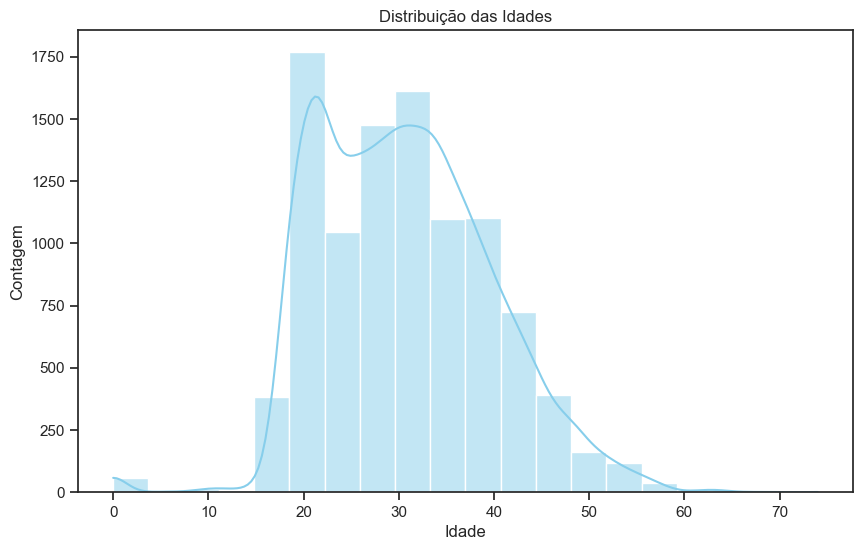

In [181]:
# Configurar o estilo do Seaborn para remover as linhas de grade verticais
sns.set(style="whitegrid", rc={"axes.grid.axis": "y"})
# Configurar o estilo do Seaborn para remover as linhas de grade horizontais
sns.set(style="ticks", rc={"axes.grid.axis": "x"})

# Plotar o gráfico de distribuição das idades
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Idade', bins=20, kde=True, color='skyblue')
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

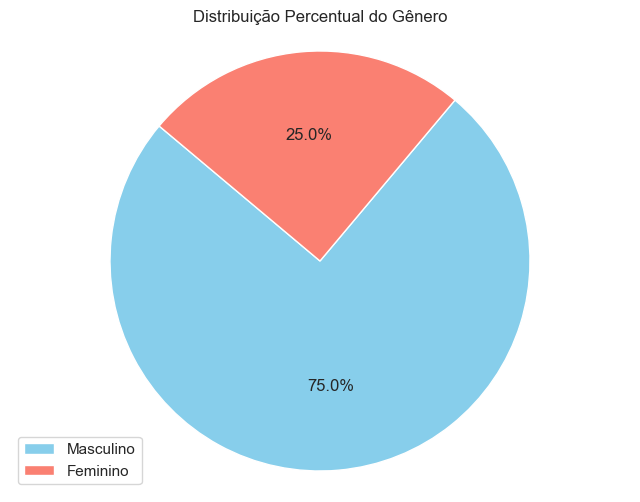

In [182]:
# Contagem de cada gênero
contagem_genero = df['Gênero'].value_counts()

# Configurar cores para o gráfico
cores = ['skyblue', 'salmon']

# Plotar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(contagem_genero, colors=cores, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Percentual do Gênero')

# Adicionar legenda na parte inferior esquerda
plt.legend(labels=contagem_genero.index, loc='lower left')

plt.axis('equal')  # Equaliza os aspectos x e y
plt.show()

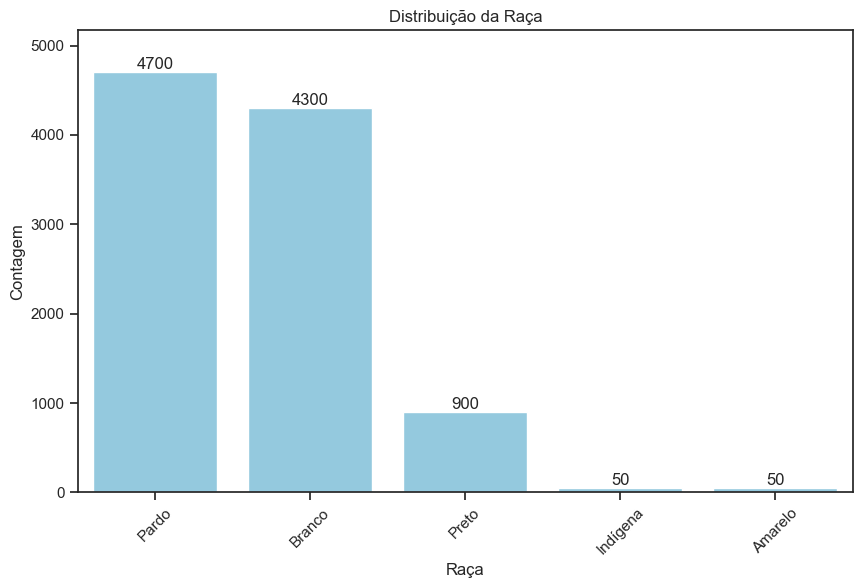

In [183]:
# Contagem de cada raça
contagem_raca = df['Raça'].value_counts()

# Configurar cor para o gráfico
cor = 'skyblue'

# Plotar o gráfico de barras verticais
plt.figure(figsize=(10, 6))
grafico = sns.barplot(x=contagem_raca.index, y=contagem_raca.values, hue=contagem_raca.index, palette=[cor]*len(contagem_raca), legend=False)
plt.title('Distribuição da Raça')
plt.xlabel('Raça')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização

# Adicionar os valores numéricos acima das barras
for index, value in enumerate(contagem_raca.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.ylim(0, contagem_raca.max() * 1.1)  # Ajustar os limites do eixo y

plt.show()

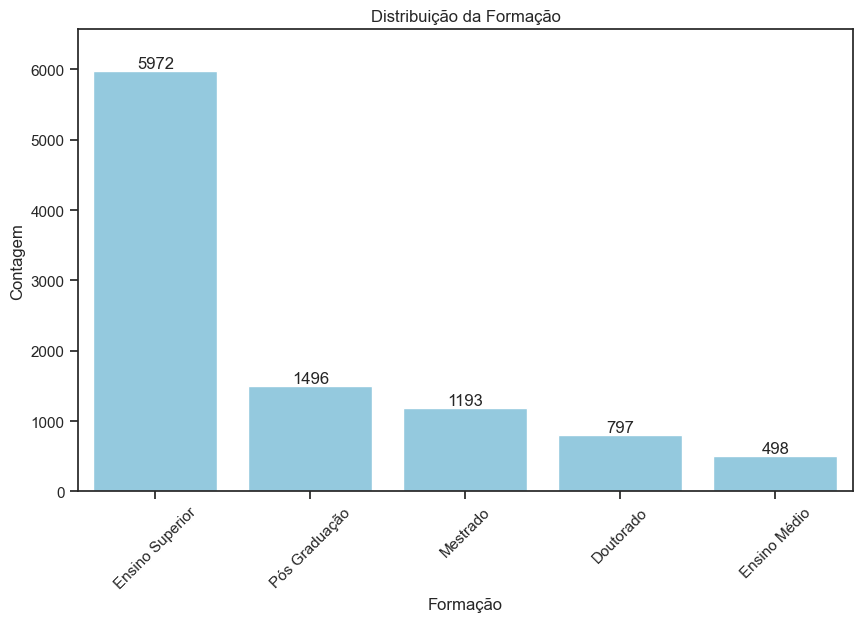

In [184]:
# Contagem de cada formação
contagem_formacao = df['Formação'].value_counts()

# Configurar cor para o gráfico
cor = 'skyblue'

# Plotar o gráfico de barras verticais
plt.figure(figsize=(10, 6))
grafico = sns.barplot(x=contagem_formacao.index, y=contagem_formacao.values, hue=contagem_formacao.index, palette=[cor]*len(contagem_formacao), legend=False)
plt.title('Distribuição da Formação')
plt.xlabel('Formação')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização

# Adicionar os valores numéricos acima das barras
for index, value in enumerate(contagem_formacao.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.ylim(0, contagem_formacao.max() * 1.1)  # Ajustar os limites do eixo y

plt.show()

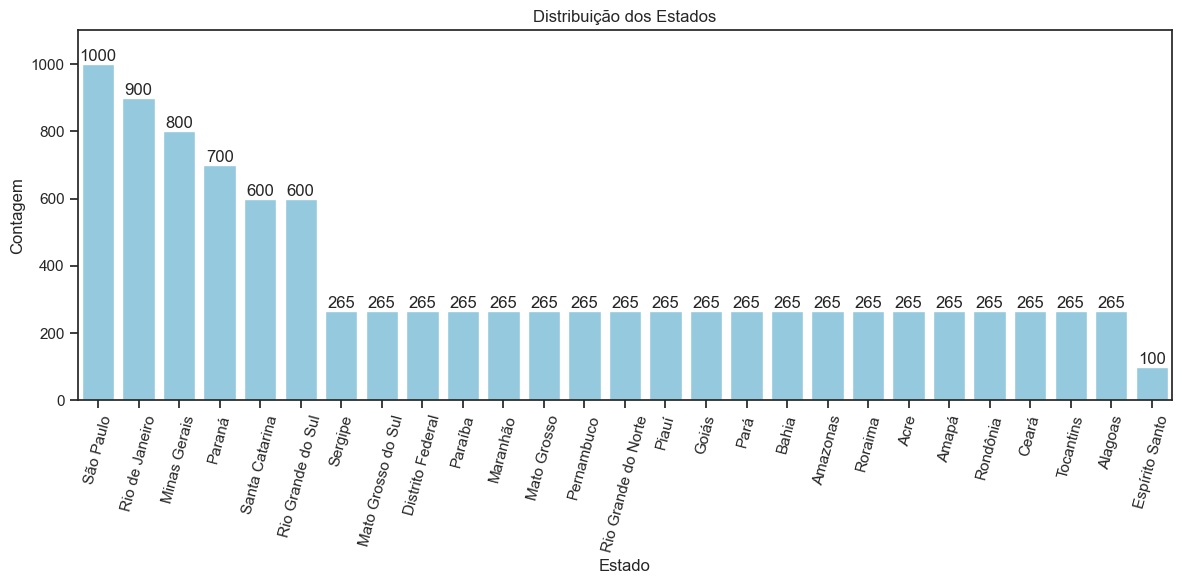

In [185]:
# Contagem de cada estado
contagem_estado = df['Estado'].value_counts()

# Configurar cor para o gráfico
cor = 'skyblue'

# Plotar o gráfico de barras verticais
plt.figure(figsize=(12, 6))
grafico = sns.barplot(x=contagem_estado.index, y=contagem_estado.values, hue=contagem_estado.index, palette=[cor]*len(contagem_estado), legend=False)
plt.title('Distribuição dos Estados')
plt.xlabel('Estado')
plt.ylabel('Contagem')
plt.xticks(rotation=75, ha='center')  # Rotaciona os rótulos do eixo x verticalmente
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos

# Adicionar os valores numéricos acima das barras
for index, value in enumerate(contagem_estado.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.ylim(0, contagem_estado.max() * 1.1)  # Ajustar os limites do eixo y

plt.show()

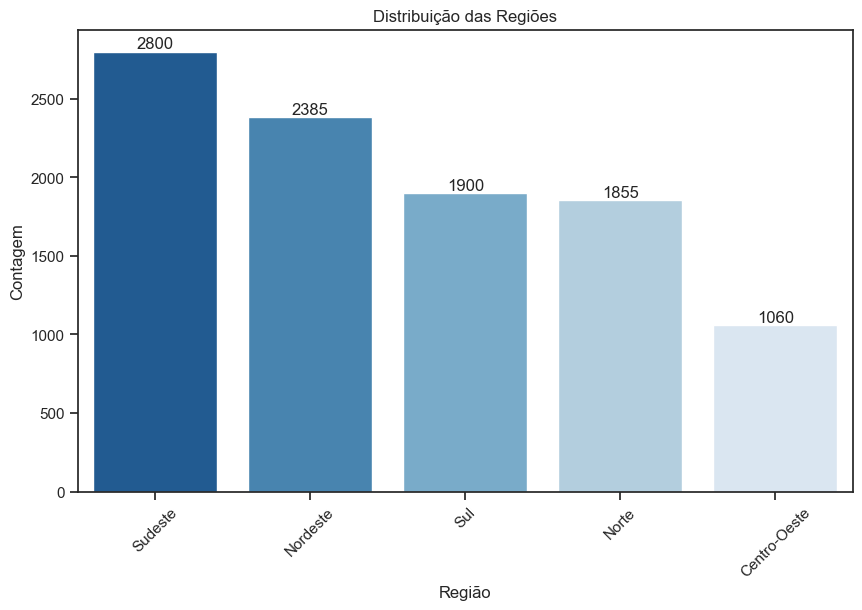

In [186]:
# Mapeamento dos estados para as regiões do Brasil
regioes = {
    'Norte': ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins'],
    'Nordeste': ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe'],
    'Centro-Oeste': ['Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul'],
    'Sudeste': ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'],
    'Sul': ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
}

# Mapeamento inverso de regiões para estados
estados_por_regiao = {estado: regiao for regiao, estados in regioes.items() for estado in estados}

# Agrupar os estados por regiões
df['Região'] = df['Estado'].map(estados_por_regiao)

# Contagem de cada região
contagem_regiao = df['Região'].value_counts()

# Definindo uma paleta de cores que varia de tons de azul
paleta_cores = sns.color_palette("Blues_r", len(contagem_regiao))

# Plotar o gráfico de barras verticais para a distribuição das regiões
plt.figure(figsize=(10, 6))
sns.barplot(x=contagem_regiao.index, y=contagem_regiao.values, palette=paleta_cores, hue=contagem_regiao.index, legend=False)
plt.title('Distribuição das Regiões')
plt.xlabel('Região')
plt.ylabel('Contagem')

# Adicionar os valores numéricos acima das barras
for index, value in enumerate(contagem_regiao.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.show()

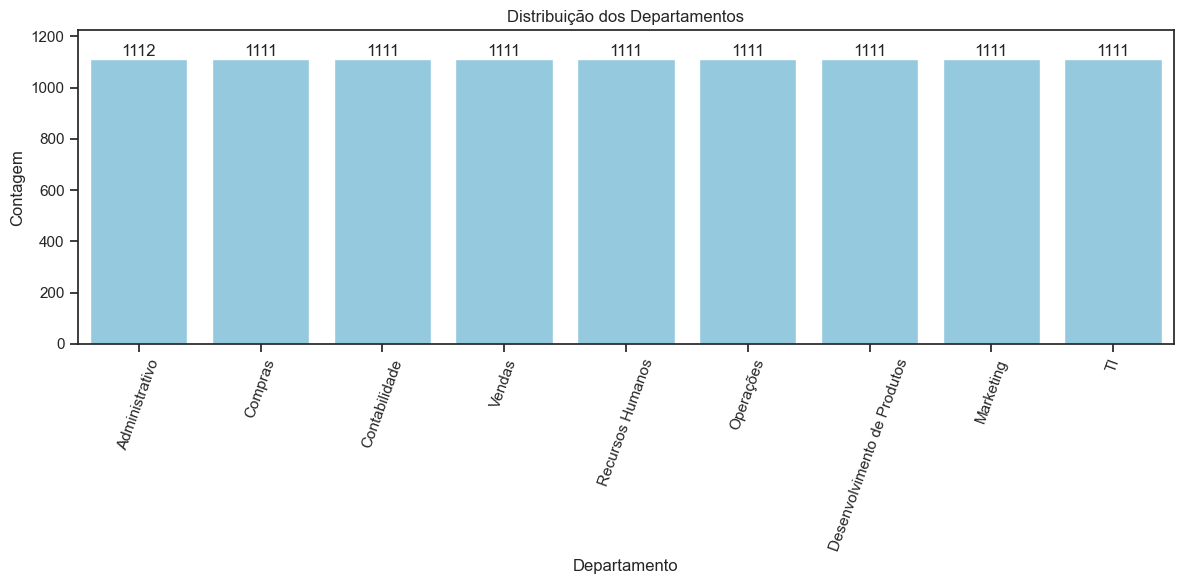

In [187]:
# Contagem de cada departamento
contagem_departamento = df['Departamento'].value_counts()

# Configurar cor para o gráfico
cor = 'skyblue'

# Plotar o gráfico de barras verticais
plt.figure(figsize=(12, 6))
grafico = sns.barplot(x=contagem_departamento.index, y=contagem_departamento.values, hue=contagem_departamento.index, palette=[cor]*len(contagem_departamento), legend=False)
plt.title('Distribuição dos Departamentos')
plt.xlabel('Departamento')
plt.ylabel('Contagem')
plt.xticks(rotation=70, ha='center')  # Rotaciona os rótulos do eixo x verticalmente
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos

# Adicionar os valores numéricos acima das barras
for index, value in enumerate(contagem_departamento.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.ylim(0, contagem_departamento.max() * 1.1)  # Ajustar os limites do eixo y

plt.show()

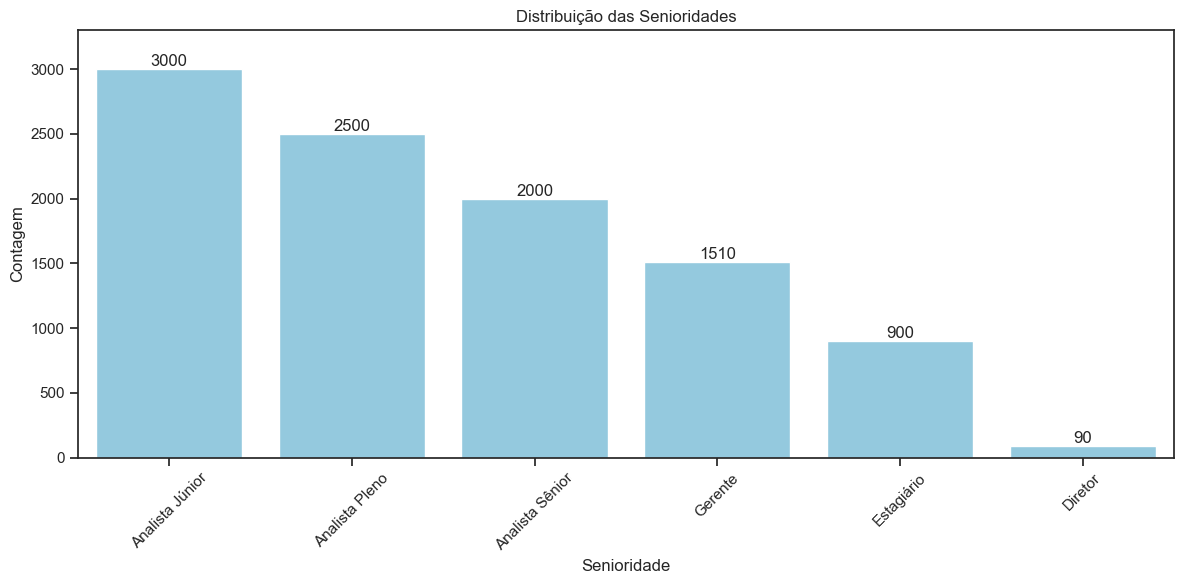

In [189]:
# Contagem de cada senioridade
contagem_senioridade = df['Senioridade'].value_counts()

# Configurar cor para o gráfico
cor = 'skyblue'

# Plotar o gráfico de barras verticais
plt.figure(figsize=(12, 6))
grafico = sns.barplot(x=contagem_senioridade.index, y=contagem_senioridade.values, hue=contagem_senioridade.index, palette=[cor]*len(contagem_senioridade), legend=False)
plt.title('Distribuição das Senioridades')
plt.xlabel('Senioridade')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='center')  # Rotaciona os rótulos do eixo x verticalmente
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos

# Adicionar os valores numéricos acima das barras
for index, value in enumerate(contagem_senioridade.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.ylim(0, contagem_senioridade.max() * 1.1)  # Ajustar os limites do eixo y

plt.show()

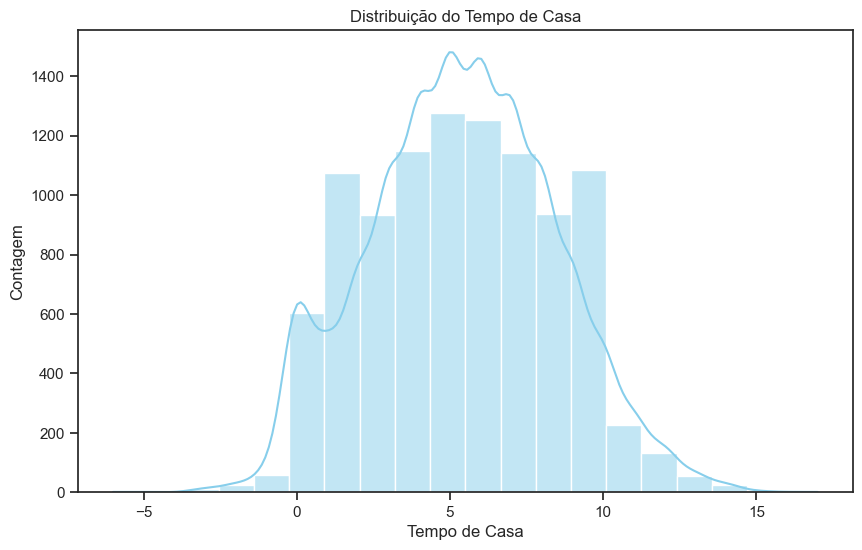

In [190]:
# Configurar o estilo do Seaborn para remover as linhas de grade verticais
sns.set(style="whitegrid", rc={"axes.grid.axis": "y"})
# Configurar o estilo do Seaborn para remover as linhas de grade horizontais
sns.set(style="ticks", rc={"axes.grid.axis": "x"})

# Plotar o gráfico de distribuição do tempo de casa
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Tempo de Casa', bins=20, kde=True, color='skyblue')
plt.title('Distribuição do Tempo de Casa')
plt.xlabel('Tempo de Casa')
plt.ylabel('Contagem')
plt.show()

# Pirâmide Etária

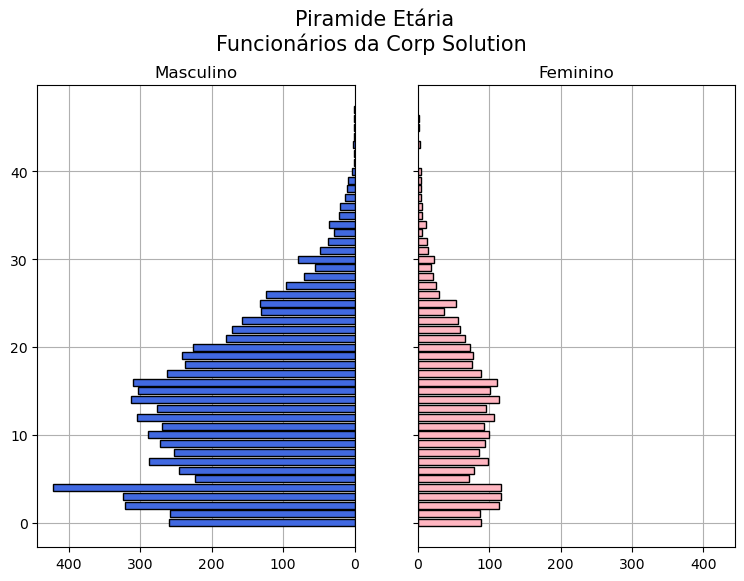

In [175]:
# separando o dataset em homens e mulheres
funcionarios_F = df[df['Gênero'] == 'Feminino']
funcionarios_M = df[df['Gênero'] == 'Masculino']

#separando por faixa Etária
funcionarios_F_idade = funcionarios_F["Idade"].value_counts()
funcionarios_M_idade = funcionarios_M["Idade"].value_counts()

funcionarios_F_idade = funcionarios_F_idade.to_frame() # convertendo a série em df
funcionarios_M_idade = funcionarios_M_idade.to_frame() # convertendo a série em df

#add name index
funcionarios_F_idade.index.name = 'Age'
funcionarios_M_idade.index.name = 'Age'

funcionarios_F_idade.reset_index(inplace=True)
funcionarios_M_idade.reset_index(inplace=True)

funcionarios_F_idade.rename(columns={'Age': 'Idade', 'count': 'Feminino'}, inplace=True)
funcionarios_M_idade.rename(columns={'Age': 'Idade', 'count': 'Masculino'}, inplace=True)

funcionarios_F_idade = funcionarios_F_idade.sort_values(by='Idade')
funcionarios_M_idade = funcionarios_M_idade.sort_values(by='Idade')

fx_etaria = funcionarios_M_idade.join(funcionarios_F_idade["Feminino"])

y = range(0, len(fx_etaria))
x_male = fx_etaria['Masculino']
x_female = fx_etaria['Feminino']

x_max = max(x_female.max(),x_male.max())*1.05 #x_max é um pouco maior que o valor mais alto
#ambos os gráficos com a mesma escala

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6)) #subplot com dois gráficos, cada um em uma coluna

#specify background color and plot title
#fig.patch.set_facecolor('xkcd:white') #muda cor do fundo
plt.figtext(.5,.9,"Piramide Etária\nFuncionários da Corp Solution \n", fontsize=15, ha='center')

#construindo os gráficos
# axes[0] -> gráfico da esqueda (masculino)
axes[0].barh(y, x_male, align='center', color='royalblue',edgecolor = 'black')
axes[0].set(title='Masculino')
axes[0].set_xlim([0, x_max])

#axes[1] -> grafico da direita (feminino)
axes[1].barh(y, x_female, align='center', color='lightpink',edgecolor = 'black')
axes[1].set(title='Feminino')
axes[1].set_xlim([0, x_max])

#adjust grid parameters and specify labels for y-axis
axes[0].grid() #inserindo o grid
axes[0].set_axisbelow(True) #colocando o grid atrás das barras
#axes[0].set(yticks=y, yticklabels=fx_etaria['Faixa Etária']) #posição das linhas do grid
axes[0].invert_xaxis() #invertendo o primeiro gráfico para ficar espelhado
axes[1].grid() #inserindo o grid
axes[1].set_axisbelow(True) #colocando o grid atrás das barras

In [176]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.drop(columns=['ID'],inplace=True)

metricas = {}

# Loop sobre as colunas do DataFrame
for coluna in df_numeric.columns:
    metricas[coluna] = {
        "Média": df[coluna].mean(),
        "Desvio padrão": df[coluna].std(),
        "Mínimo": df[coluna].min(),
        "Q1": df[coluna].quantile(0.25),
        "Mediana": df[coluna].median(),
        "Q3": df[coluna].quantile(0.75),
        "IQR": df[coluna].quantile(0.75) - df[coluna].quantile(0.25),
        "Máximo": df[coluna].max(),
        "Skewness": df[coluna].skew(),
        "Moda": df[coluna].mode()[0]
    }

df_metricas = pd.DataFrame(metricas).T
df_metricas

,Média,Desvio padrão,Mínimo,Q1,Mediana,Q3,IQR,Máximo,Skewness,Moda
Idade,30.931066,8.667053,18.0,24.0,30.0,37.0,13.0,74.0,0.546464,22.0
Tempo de Casa,5.448734,2.966746,0.0,3.0,5.0,7.0,4.0,17.0,0.126351,5.0
idade_inicio,2.097529,0.954691,0.0,1.0,2.0,3.0,2.0,6.0,0.453982,2.0


# Tempo de Casa

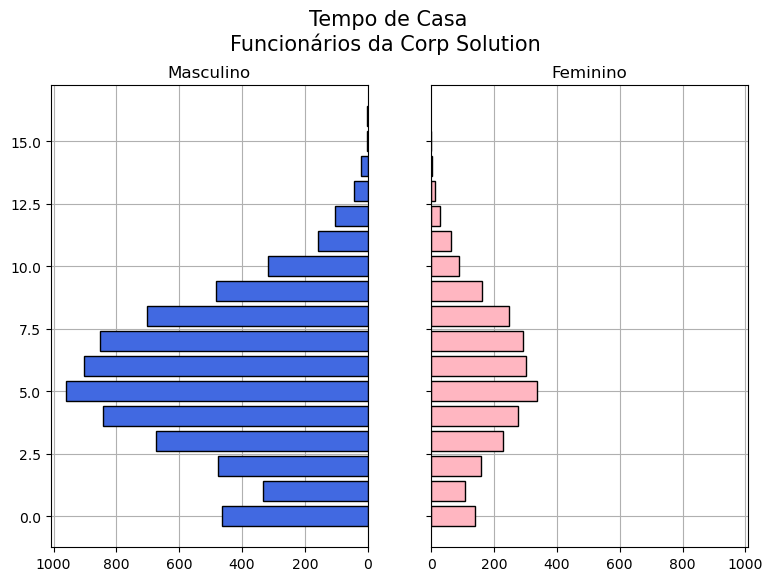

In [177]:
# separando o dataset em homens e mulheres
funcionarios_F = df[df['Gênero'] == 'Feminino']
funcionarios_M = df[df['Gênero'] == 'Masculino']

#separando por faixa Etária
funcionarios_F_idade = funcionarios_F["Tempo de Casa"].value_counts()
funcionarios_M_idade = funcionarios_M["Tempo de Casa"].value_counts()

funcionarios_F_idade = funcionarios_F_idade.to_frame() # convertendo a série em df
funcionarios_M_idade = funcionarios_M_idade.to_frame() # convertendo a série em df

#add name index
funcionarios_F_idade.index.name = 'Age'
funcionarios_M_idade.index.name = 'Age'

funcionarios_F_idade.reset_index(inplace=True)
funcionarios_M_idade.reset_index(inplace=True)

funcionarios_F_idade.rename(columns={'Age': 'Idade', 'count': 'Feminino'}, inplace=True)
funcionarios_M_idade.rename(columns={'Age': 'Idade', 'count': 'Masculino'}, inplace=True)

funcionarios_F_idade = funcionarios_F_idade.sort_values(by='Idade')
funcionarios_M_idade = funcionarios_M_idade.sort_values(by='Idade')

fx_etaria = funcionarios_M_idade.join(funcionarios_F_idade["Feminino"])

y = range(0, len(fx_etaria))
x_male = fx_etaria['Masculino']
x_female = fx_etaria['Feminino']

x_max = max(x_female.max(),x_male.max())*1.05 #x_max é um pouco maior que o valor mais alto
#ambos os gráficos com a mesma escala

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6)) #subplot com dois gráficos, cada um em uma coluna

#specify background color and plot title
#fig.patch.set_facecolor('xkcd:white') #muda cor do fundo
plt.figtext(.5,.9,"Tempo de Casa\nFuncionários da Corp Solution \n", fontsize=15, ha='center')

#construindo os gráficos
# axes[0] -> gráfico da esqueda (masculino)
axes[0].barh(y, x_male, align='center', color='royalblue',edgecolor = 'black')
axes[0].set(title='Masculino')
axes[0].set_xlim([0, x_max])

#axes[1] -> grafico da direita (feminino)
axes[1].barh(y, x_female, align='center', color='lightpink',edgecolor = 'black')
axes[1].set(title='Feminino')
axes[1].set_xlim([0, x_max])

#adjust grid parameters and specify labels for y-axis
axes[0].grid() #inserindo o grid
axes[0].set_axisbelow(True) #colocando o grid atrás das barras
#axes[0].set(yticks=y, yticklabels=fx_etaria['Faixa Etária']) #posição das linhas do grid
axes[0].invert_xaxis() #invertendo o primeiro gráfico para ficar espelhado
axes[1].grid() #inserindo o grid
axes[1].set_axisbelow(True) #colocando o grid atrás das barras

(-76.24759047174989, -26.590499411250004, -35.7023289475499, 7.222992030550026)

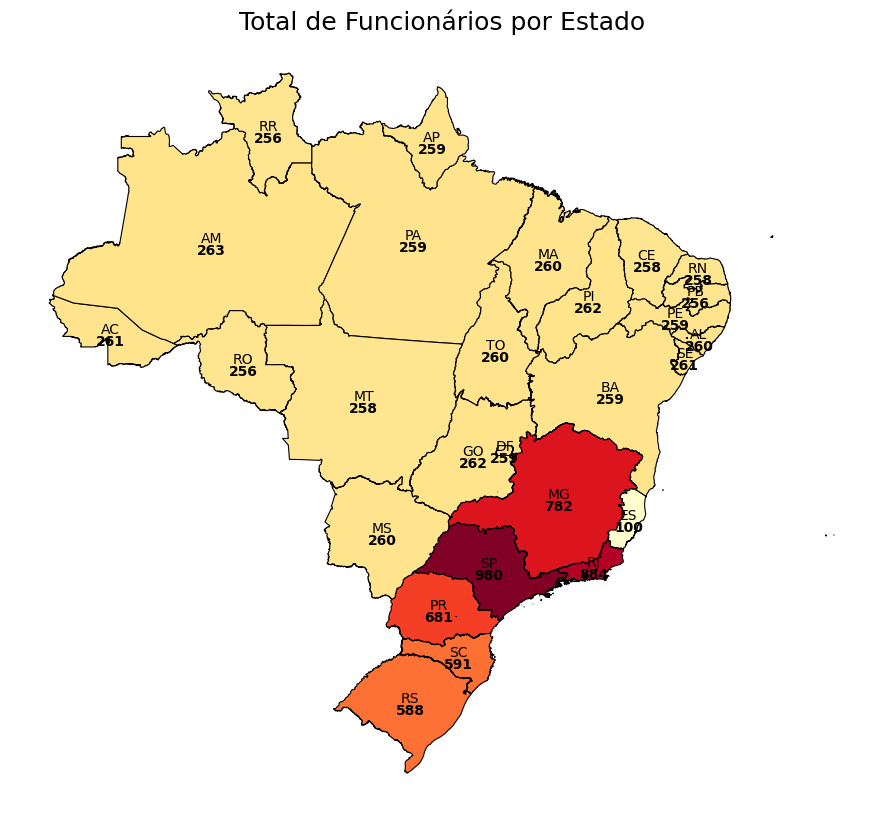

In [178]:
#importando o shapefile do brasil
infos_ufs = gpd.read_file('./BR_UF/BR_UF_2022.shp')

funcionario_p_UF = df["Estado"].value_counts() # quantidade por Estado
dict_esc_p_UF = funcionario_p_UF.to_dict() # convertendo para o tipo dicionário

# Dicionário de mapeamento de estados
mapeamento_estados = {
    'Acre': 'AC',
    'Alagoas': 'AL',
    'Amapá': 'AP',
    'Amazonas': 'AM',
    'Bahia': 'BA',
    'Ceará': 'CE',
    'Distrito Federal': 'DF',
    'Espírito Santo': 'ES',
    'Goiás': 'GO',
    'Maranhão': 'MA',
    'Mato Grosso': 'MT',
    'Mato Grosso do Sul': 'MS',
    'Minas Gerais': 'MG',
    'Pará': 'PA',
    'Paraíba': 'PB',
    'Paraná': 'PR',
    'Pernambuco': 'PE',
    'Piauí': 'PI',
    'Rio de Janeiro': 'RJ',
    'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO',
    'Roraima': 'RR',
    'Santa Catarina': 'SC',
    'São Paulo': 'SP',
    'Sergipe': 'SE',
    'Tocantins': 'TO'
}

# Convertendo os nomes completos dos estados para suas respectivas siglas
dicionario_siglas = {mapeamento_estados[estado]: valor for estado, valor in dict_esc_p_UF.items()}

#incluindo uma coluna de quantidade de participantes por sigla no df infos_ufs
infos_ufs['Estado'] = infos_ufs['SIGLA_UF'].map(dicionario_siglas)

#mapa

fig, ax = plt.subplots(1, figsize = (20,10))
infos_ufs.plot(column = 'Estado',
               ax=ax,
               cmap = 'YlOrRd',
               linewidth=0.8,
               figsize = (20,7),
               legend = False,
               edgecolor = 'black')
plt.title("Total de Funcionários por Estado", fontsize = 18)
infos_ufs.apply(lambda x: ax.annotate(text=x.SIGLA_UF, xy=x.geometry.centroid.coords[0], ha='center', color = "black"), axis=1)
infos_ufs.apply(lambda x: ax.annotate(text=x.Estado, xy=x.geometry.centroid.coords[0], xytext=(0,-12), textcoords='offset pixels', ha='center', color = "black", weight='semibold'), axis=1)
ax.axis('off')


(-76.24759047174989, -26.590499411250004, -35.7023289475499, 7.222992030550026)

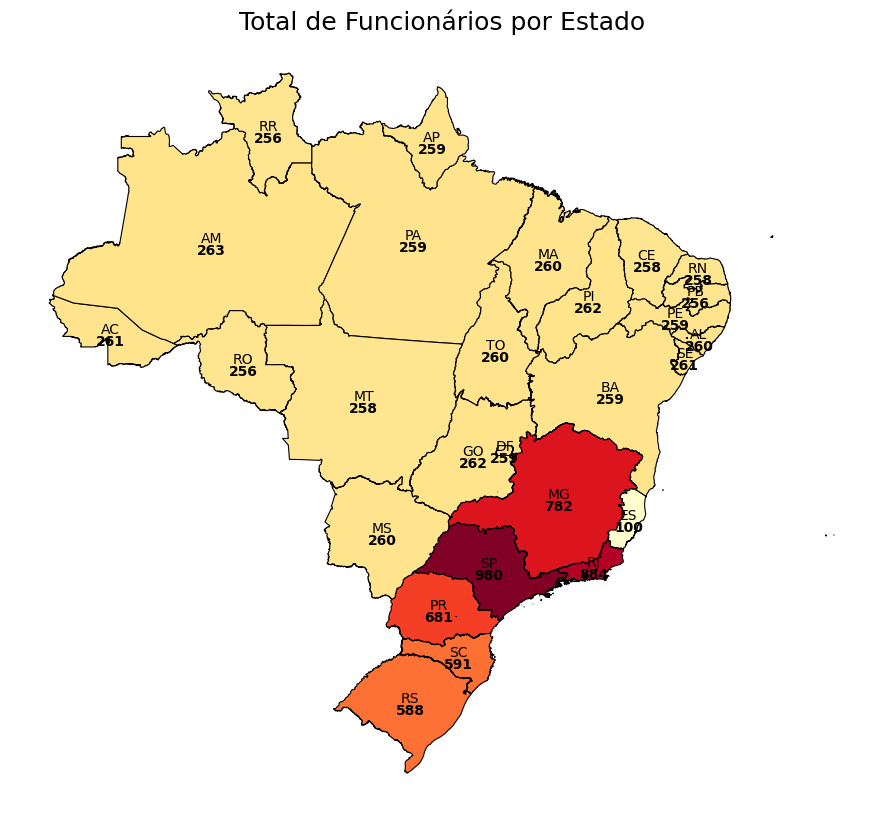

In [179]:
#importando o shapefile do brasil
infos_ufs = gpd.read_file('./BR_UF/BR_UF_2022.shp')

funcionario_p_UF = df["Estado"].value_counts() #quantidade por Estado
dict_esc_p_UF = funcionario_p_UF.to_dict() # convertendo para o tipo dicionário

#incluindo uma coluna de quantidade de participantes por sigla no df infos_ufs
infos_ufs['Estado'] = infos_ufs['SIGLA_UF'].map(dicionario_siglas)

#mapa

fig, ax = plt.subplots(1, figsize = (20,10))
infos_ufs.plot(column = 'Estado',
               ax=ax,
               cmap = 'YlOrRd',
               linewidth=0.8,
               figsize = (20,7),
               legend = False,
               edgecolor = 'black')
plt.title("Total de Funcionários por Estado", fontsize = 18)
infos_ufs.apply(lambda x: ax.annotate(text=x.SIGLA_UF, xy=x.geometry.centroid.coords[0], ha='center', color = "black"), axis=1)
infos_ufs.apply(lambda x: ax.annotate(text=x.Estado, xy=x.geometry.centroid.coords[0], xytext=(0,-12), textcoords='offset pixels', ha='center', color = "black", weight='semibold'), axis=1)
ax.axis('off')

In [180]:
brasil = gpd.read_file('./BR_UF/BR_UF_2022.shp')
brasil

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry
0,12,Acre,AC,Norte,164173.429,"POLYGON ((-68.79282 -10.99957, -68.79367 -10.9..."
1,13,Amazonas,AM,Norte,1559255.881,"POLYGON ((-56.76292 -3.23221, -56.76789 -3.242..."
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ..."
3,16,Amapá,AP,Norte,142470.762,"MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ..."
4,17,Tocantins,TO,Norte,277423.627,"POLYGON ((-48.24830 -13.19239, -48.24844 -13.1..."
5,21,Maranhão,MA,Nordeste\n,329651.496,"MULTIPOLYGON (((-44.58680 -2.23341, -44.58696 ..."
6,22,Piauí,PI,Nordeste\n,251755.481,"POLYGON ((-42.47034 -3.48377, -42.46126 -3.484..."
7,23,Ceará,CE,Nordeste\n,148894.447,"POLYGON ((-37.87162 -4.36640, -37.87109 -4.367..."
8,24,Rio Grande do Norte,RN,Nordeste\n,52809.599,"MULTIPOLYGON (((-35.18728 -5.78987, -35.18707 ..."
9,25,Paraíba,PB,Nordeste\n,56467.242,"MULTIPOLYGON (((-34.79580 -7.17500, -34.79578 ..."


In [182]:
brasil = gpd.read_file('./BR_UF/BR_UF_2022.shp')

funcionario_p_UF = df.groupby(["Estado", "Gênero"]).size()
funcionario_p_UF_sexo = funcionario_p_UF.groupby(['Estado', 'Gênero']).sum()
funcionario_p_UF_sexo = funcionario_p_UF_sexo.unstack().fillna(0).astype(int)
funcionario_p_UF_sexo_reset = funcionario_p_UF_sexo.reset_index()
funcionario_p_UF_sexo_reset['Estado'] = funcionario_p_UF_sexo_reset['Estado'].map(mapeamento_estados)
funcionario_p_UF_sexo_reset.rename(columns={'Estado': 'SIGLA_UF'}, inplace=True)
funcionario_p_UF_sexo_reset['SIGLA_UF'] = funcionario_p_UF_sexo_reset['SIGLA_UF'].astype(str)


brasil_func = brasil.merge(funcionario_p_UF_sexo_reset, on='SIGLA_UF')


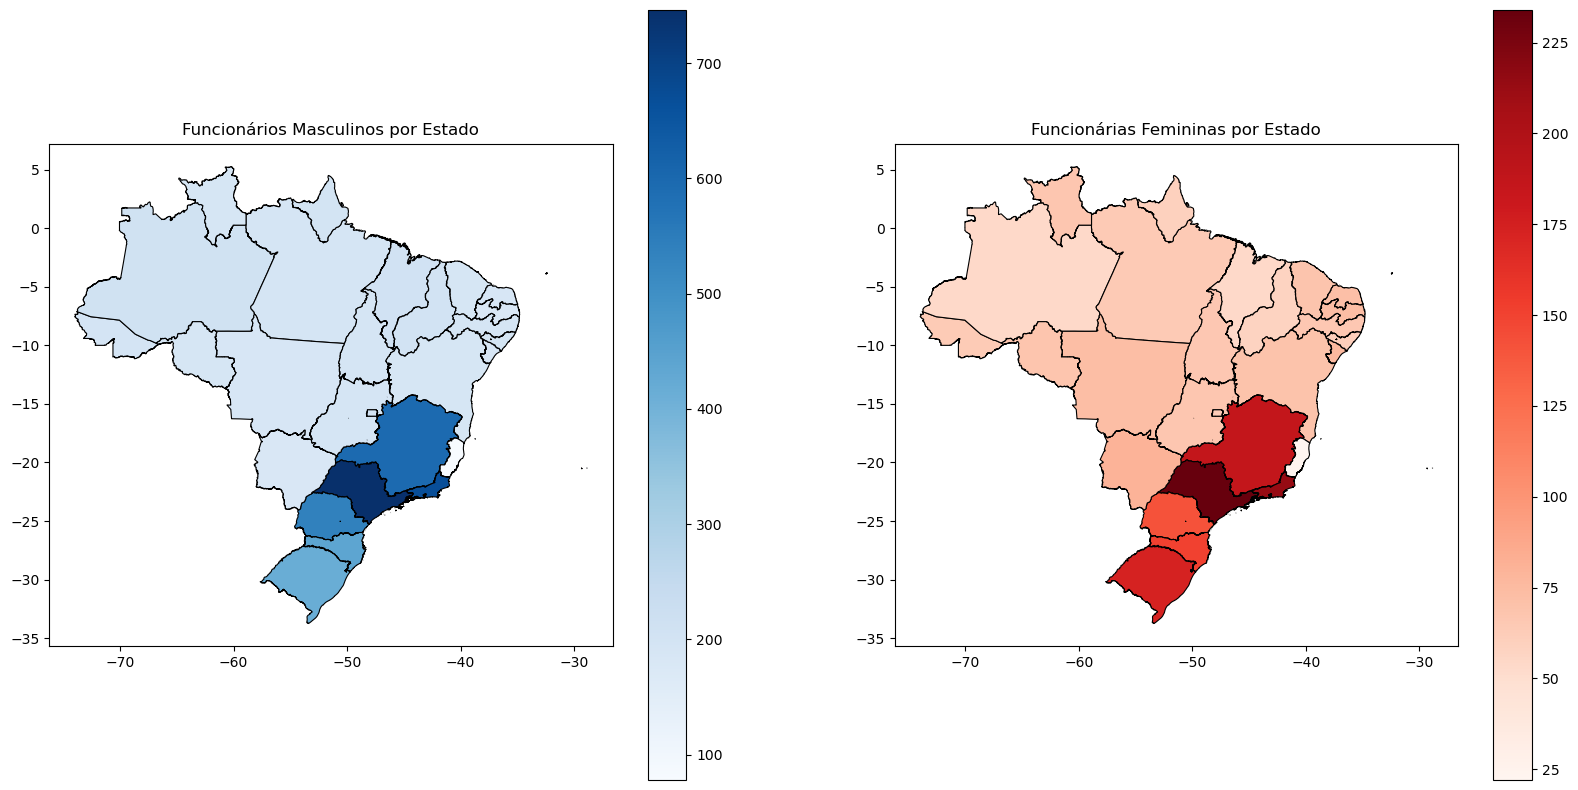

In [183]:
# Carregar o arquivo shapefile do mapa do Brasil
brasil = gpd.read_file('./BR_UF/BR_UF_2022.shp')



# Convertendo os nomes completos dos estados para suas respectivas siglas
funcionario_p_UF = df.groupby(["Estado", "Gênero"]).size()
funcionario_p_UF_sexo = funcionario_p_UF.groupby(['Estado', 'Gênero']).sum()
funcionario_p_UF_sexo = funcionario_p_UF_sexo.unstack().fillna(0).astype(int)
funcionario_p_UF_sexo_reset = funcionario_p_UF_sexo.reset_index()
funcionario_p_UF_sexo_reset['Estado'] = funcionario_p_UF_sexo_reset['Estado'].map(mapeamento_estados)
funcionario_p_UF_sexo_reset.rename(columns={'Estado': 'SIGLA_UF'}, inplace=True)
funcionario_p_UF_sexo_reset['SIGLA_UF'] = funcionario_p_UF_sexo_reset['SIGLA_UF'].astype(str)

# Juntar os dados do dataframe com os dados geoespaciais do Brasil
brasil_func = brasil.merge(funcionario_p_UF_sexo_reset, on='SIGLA_UF')

# Plotar mapa para funcionários masculinos
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plotar mapa para funcionários masculinos
brasil_func.plot(column='Masculino', ax=ax[0], cmap='Blues', linewidth=0.8, edgecolor='black', legend=True)
ax[0].set_title('Funcionários Masculinos por Estado')

# Plotar mapa para funcionários femininos
brasil_func.plot(column='Feminino', ax=ax[1], cmap='Reds', linewidth=0.8, edgecolor='black', legend=True)
ax[1].set_title('Funcionárias Femininas por Estado')

plt.show()


